<font color="#414bc1"><h1 align="center">Máster en Big Data y Data Science [2022-23]</h1></font>
<font color="#2a2f60"><h2 align="center">Estadística - Contraste de hipótesis</h2></font>
<font color="#414bc1"><h3 align="center">Luis Fernándo Lago Fernández - Universidad Autónoma de Madrid</h2></font>


## 0. Recursos

Estas notas están basadas en el capítulo 10 del libro de *Daniel Peña*, que es una referencia básica para la asignatura:

- Daniel Peña: "Fundamentos de Estadística". Alianza Editorial, 2001.

Voy a seguir la exposición de *Peña* bastante al pie de la letra, utilizando los mismos ejemplos que en el libro, si bien todos los cálculos los haré con python utilizando el módulo de SciPy para funciones estadísticas, <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a>. 

En la siguiente celda se importan todos los módulos necesarios.

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import chi2
from scipy.stats import t as student
import matplotlib.pyplot as plt
import math

Y la siguiente define una función que usaremos para dibujar distribuciones y regiones de aceptación y rechazo de las hipótesis.

In [ ]:
def plot_regions(x, y, tsup, tinf=None, tobs=None):

    plt.figure(figsize=(10, 3))
    if tinf is None:
        plt.fill_between(x, 0, y, (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')
    else:
        plt.fill_between(x, 0, y, (x >= tinf) & (x <= tsup), facecolor='green')
        plt.fill_between(x, 0, y, (x < tinf), facecolor='red')
        plt.fill_between(x, 0, y, (x > tsup), facecolor='red')

    plt.plot(x, y, '-k', linewidth=2.0)
    
    if tobs is not None:
        plt.plot([tobs, tobs], [0, 0.5*y.max()], '-b', linewidth=2.0)

    plt.grid(True)
    plt.title("Regiones de aceptacion y rechazo")
    plt.show()

## 1. Introducción

***Qué es una hipótesis:***

- Suposición de algo posible o imposible para sacar de ello una consecuencia (<a href="http://dle.rae.es/?id=KUtnGU1">rae.es</a>).
- Suposición sin pruebas que se toma como base de un razonamiento (<a href="http://www.wordreference.com/definicion/hip%C3%B3tesis">wordreference.com</a>).

Normalmente asumimos hipótesis simples, fáciles de contrastar empíricamente. Contrastar una hipótesis es comparar sus predicciones con los datos observados. Si coinciden, dentro de un determinado margen de error, la hipótesis se acepta. En caso contrario se rechaza.

***Ejemplo inicial (Peña, p. 378):***

Un caso típico de hipótesis a contrastar es la suposición de que una determinada población sigue una distribución conocida. Por ejemplo, imaginemos que en un proceso de fabricación se producen determinados productos con una vida media de 5000 horas y desviación estándar de 100 horas. Hay sospechas de que un determinado lote de productos (el lote A) ha resultado defectuoso, lo que implicaría una vida media más baja. Para comprobarlo se toma una muestra de 4 productos del lote A y se analiza el tiempo de vida de cada uno de ellos, que resulta ser de 5010, 4750, 4827 y 4953 horas. 

In [ ]:
# Tiempo de vida de los 4 productos del lote A seleccionados:
t = np.array([5010, 4750, 4827, 4953])

*¿Existe evidencia estadística de que la vida media de los productos del lote A es menor de 5000 horas?*

Para comprobarlo, asumimos la hipótesis de que la vida media de los productos del lote A sigue la misma distribución que la del resto de productos, es decir es una normal con media $\mu_0 = 5000$ y desviación estándar $\sigma_0 = 100$. Esta hipótesis se suele denominar hipótesis nula, y se representa como $H_0$. La hipótesis alternativa, o $H_1$, implicaría que la vida media de los productos del lote A es menor de 5000 horas.

Sabemos que, para cualquier población con media $\mu$ y desviación estándar $\sigma$, la media de una muestra de tamaño $n$ se distribuye asintóticamente según una normal $N(\mu, \sigma/\sqrt{n})$. Por tanto, si la hipótesis $H_0$ es cierta, la vida media $\bar{t}$ de una muestra aleatoria de 4 productos debería distribuirse según una normal:

$$
\bar{t} \sim N(5000, \frac{100}{\sqrt{4}}) = N(5000, 50)
$$

En la siguiente figura se muestra esta distribución, en rojo, junto con el valor de la vida media observada para la muestra de productos del lote A, que es $\bar{t}_{obs} = 4885$ horas, en azul. Para obtener la *pdf* de una distribución normal estamos usando el módulo <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">scipy.stats.norm</a> de *SciPy*.


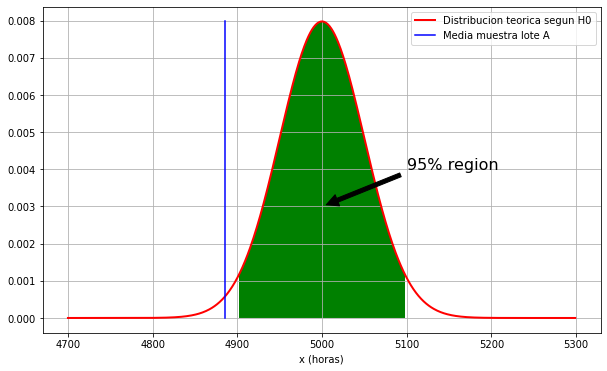

In [ ]:
# Distribución teórica para la vida media de 4 productos de acuerdo a la hipótesis H0:
mu_0 = 5000.0
sigma_0 = 100.0
n = 4.0
x = np.arange(4700, 5300, 1)
y = norm.pdf(x, mu_0, sigma_0/math.sqrt(n))

# Vida media de la muestra:
t_media_muestra = t.mean()

# Representación gráfica:
plt.figure(figsize=(10, 6))
plt.fill_between(x, 0, y, (x>=4902) & (x<=5098), facecolor='green')
plt.plot(x, y, '-r', linewidth=2.0, label='Distribucion teorica segun H0')
plt.plot([t_media_muestra, t_media_muestra], [0, y.max()], '-b', label='Media muestra lote A')

plt.annotate('95% region', xy=(5000, 0.003), xytext=(5100, 0.004), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=16)
plt.grid(True)
plt.xlabel('x (horas)')
plt.legend()
plt.show()

Ahora nos preguntamos si es razonable (desde el punto de vista estadístico) obtener el valor $\bar{t}_{obs} = 4885$ a partir de la distribución anterior. Sabemos que una distribución gausiana acumula el 95% de probabilidad en el intervalo entre $[\mu - 1.96 \sigma, \mu + 1.96 \sigma]$. Por tanto, con probabilidad 95% se debería cumplir:

$$
4902 \leq \bar{t}_{obs} \leq 5098
$$

Y no es el caso. La evidencia parece indicar que efectivamente el lote A es defectuoso y el tiempo de vida media de los productos del lote es menor que el esperado. Por supuesto podría darse el caso de que el lote no fuera defectuoso y las diferencias observadas se deban al azar, pero esto es poco probable. Podemos calcular la probabilidad de obtener un valor de $\bar{t} \leq 4885$ usando la *cdf* de la distribución normal:

In [ ]:
norm.cdf(4885, mu_0, sigma_0/math.sqrt(n))

0.010724110021675809

Como vemos esta probabilidad es de aproximadamente el 1%.

## 2. Tipos de hipótesis

***Definición de hipótesis estadística (Peña, p. 380):*** 

- Suposición que determina, parcial o totalmente, la distribución de probabilidad de una o varias variables aleatorias.

<hr>

***Tipos de hipótesis:***

Peña clasifica las hipótesis estadísticas en tres tipos:

- **TIPO 1:** Aquellas que especifican un **valor o un intervalo de valores para los parámetros de la distribución de una variable**. Un ejemplo de hipótesis de este tipo puede ser la suposición de que la media de una determinada variable es 5000.<br><br>

- **TIPO 2:** Aquellas que establecen la **igualdad entre las distribuciones de dos variables**. Un ejemplo de hipótesis de este tipo puede ser la suposición de que las medias de dos poblaciones normales son idénticas.<br><br>

- **TIPO 3:** Aquellas que determinan la **forma en la que se distribuye una variable**. Un ejemplo de hipótesis de este tipo puede ser la suposición de que la distribución de una determinada variable es normal.<br>

En este curso estudiaremos contrastes de hipótesis de tipo 1 con un solo parámetro (**contrastes paramétricos**). Dentro de las hipótesis de tipo 1, llamaremos *hipótesis simples* a aquellas que especifican un valor concreto para el parámetro, e *hipótesis compuestas* a las que especifican un intervalo de valores para el mismo. El ejemplo planteado al principio es un caso hipótesis de tipo 1 en el que el parámetro es la media de la distribución.

<hr>

**Hipótesis nula:**

La hipótesis nula o $H_0$ es la hipótesis que queremos contrastar. $H_0$ se supone cierta de entrada, y se mantiene a menos que la evidencia experimental la rechace. Es importante tener en cuenta que la hipótesis nula nunca se considera probada. La suponemos cierta porque es la hipótesis más plausible y simple, y lo más que podemos hacer es verificar si los datos observados son consistentes con ella o no. 

- En caso de que los datos observados sean muy improbables bajo $H_0$, esta se rechaza.

- En caso de que los datos sean consistentes con $H_0$, esta se mantiene.

En el ejemplo inicial, los datos observados son compatibles con la hipótesis sólo el 1% de las veces. Esto nos llevó a rechazar la hipótesis.

<hr>

**Hipótesis alternativa:**

La hipótesis alternativa o $H_1$ es la hipótesis que sustituye a $H_0$ en caso de que esta última se rechace. Hay dos casos típicos de hipótesis alternativas a la hipótesis nula $H_0$: $\theta = \theta_0$ de tipo 1:

- $H_1$: $\theta \neq \theta_0$. Si $H_0$ no se cumple desconocemos si el valor del parámetro será mayor o menor que el de partida. Este tipo de contraste se llama **bilateral**.

- $H_1$: $\theta > \theta_0$ (o de manera equivalente $\theta < \theta_0$). En este caso sabemos que si $H_0$ no se cumple el parámetro ha de ser mayor (o menor) que el de la hipótesis. Este tipo de contraste se llama **unilateral**. 

## 3. Metodología del contraste

- Resultado de los trabajos de R.A. Fisher, J. Neyman y E.S. Pearson entre 1920 y 1933. <br><br>

- Metodología similar a un juicio: suponemos, que no demostramos, la *hipótesis de inocencia* (hipótesis nula) mientras no haya evidencia experimental suficiente para rechazarla estadísticamente.

<hr> 

***Etapas del contraste (paramétrico):***

1. Definir las hipótesis nula ($H_0$) y alternativa ($H_1$). <br><br>

2. Definir una medida de discrepancia entre los datos muestrales ($X$) y la hipótesis nula ($H_0$). Esta medida de discrepancia, $d(\theta_0, \hat{\theta})$, es una función del valor del parámetro asociado a la hipótesis ($\theta_0$) y del valor del parámetro estimado a partir de la muestra ($\hat{\theta}$), y debe tener una distribución conocida cuando $H_0$ es cierta. <br><br>

3. Dada la distribución de $d$ cuando $H_0$ se cumple, definir regiones de aceptación y rechazo para la hipótesis nula. La región de rechazo corresponderá a valores de $d$ que puedan ser considerados una evidencia suficiente para rechazar la hipótesis (porque la diferencia entre $\theta_0$ y $\hat{\theta}$ es demasiado grande para que podamos atribuirla al azar).<br><br>

4. Tomar la muestra, calcular $\hat{\theta}$ y $d(\theta_0, \hat{\theta})$. Si $d(\theta_0, \hat{\theta})$ cae en la región de rechazo, entonces rechazamos la hipótesis nula $H_0$ y aceptamos $H_1$. En caso contrario mantenemos $H_0$.

<hr> 

***Medidas de discrepancia:***

Es frecuente utilizar como medida de discrepancia estadísticos del tipo:

$$
d = \frac{\theta_0 -\hat{\theta}_{MV}}{\hat{\sigma}_{MV}}
$$

donde $\hat{\theta}_{MV}$ es el estimador de máxima verosimilitud de $\theta$ y $\hat{\sigma}_{MV}$ su desviación estándar. Para muestras suficientemente grandes esta medida es aproximadamente gausiana:

$$
d \sim N(0, 1)
$$

Y se suelen utilizar los valores de $d$ más alejados de $0$ para definir la región de rechazo, como se muestra a continuación. 

<hr> 

***Nivel de significación y región de rechazo:***

El rango de valores de $d$ que se pueden observar cuando $H_0$ es cierta se divide en dos regiones:

- **Región de aceptación**: discrepancias entre $\theta_0$ y $\hat{\theta}$ que son aceptables.<br><br>

- **Región de rechazo**: discrepancias entre $\theta_0$ y $\hat{\theta}$ que son demasiado grandes para ser aceptadas. Son discrepancias que tienen una probabilidad pequeña de ocurrir cuando la hipótesis nula es cierta. Normalmente se consideran probabilidades $\alpha = 0.05$, $\alpha = 0.01$ o $\alpha = 0.001$. La probabilidad $\alpha$ se denomina **nivel de significación**, y puede verse también como la probabilidad de rechazar $H_0$ cuando es cierta:

$$
\alpha = P(rechazar \, H_0 \, | \, H_0 \, cierta)
$$

Una vez fijado el nivel de significación $\alpha$, las regiones de aceptación y rechazo se determinan a partir de la distribución de $d(\theta_0, \hat{\theta})$. Para contrastes paramétricos bilaterales difinimos la región de aceptación como:

$$
-d_{\alpha/2} \leq d \leq d_{\alpha/2}
$$

Y la región de rechazo como la complementaria a la anterior. La constante $d_{\alpha/2}$ se elige de modo que el intervalo $[-d_{\alpha/2}, d_{\alpha/2}]$ concentre una probabilidad $1 - \alpha$.

Para un contraste paramétrico unilateral, por ejemplo $H_1$: $\theta > \theta_0$, tomaríamos como medida de discrepancia el estadístico:

$$
d = \frac{\hat{\theta}_{MV} - \theta_0}{\hat{\sigma}_{MV}}
$$

Y definiríamos la región de aceptación como:

$$
d \leq d_{\alpha}
$$

En este último caso $d_{\alpha}$ se elige de modo que el intervalo $[-\infty, d_{\alpha}]$ concentre una probabilidad $1 - \alpha$.

<hr>

***Ejemplo:***

Volviendo al ejemplo del principio:

- $H_0$: la vida media de los productos del lote A es la misma que la del resto de productos, $\mu = \mu_0$. <br><br>
- $H_1$: la vida media de los productos del lote A es menor que la del resto de productos, $\mu < \mu_0$.

Sabemos que $\mu_0 = 5000$, y en ambos casos $\sigma = \sigma_0 = 100$. Definimos la discrepancia como:

$$ 
d = \frac{\mu_0 - \hat{\mu}_{MV}}{\hat{\sigma}_{MV}} 
$$

Donde $\hat{\mu}_{MV} = \bar{t} = 4885$ y $\hat{\sigma}_{MV} = \sigma_0 / \sqrt{n} = 100 / \sqrt{4} = 50$. Sabemos que $d$ se distribuye según una $N(0, 1)$ cuando $H_0$ es cierta. Fijamos el nivel de significación $\alpha = 0.05$ y determinamos las regiones de aceptación y rechazo como se muestra a continuación.

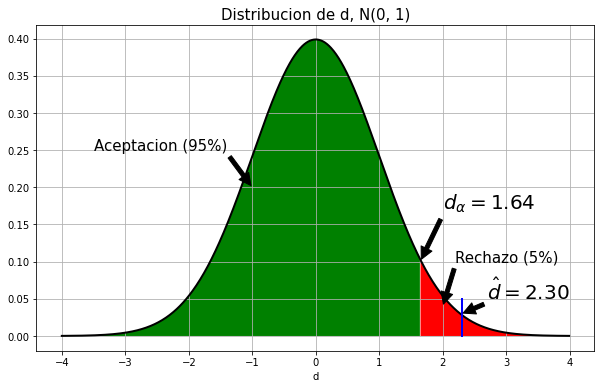

In [ ]:
# Distribución para d:
x = np.arange(-4, 4, 0.01)
y = norm.pdf(x)

# Límite para la zona de aceptación:
alpha = 0.05
d_alpha = norm.ppf(1-alpha)

# Valor de d observado:
d_obs = (mu_0 - t_media_muestra) / (sigma_0/math.sqrt(n))

# Representación gráfica:
plt.figure(figsize=(10, 6))
plt.fill_between(x, 0, y, (x<=d_alpha), facecolor='green')
plt.fill_between(x, 0, y, (x>d_alpha), facecolor='red')
plt.plot(x, y, '-k', linewidth=2.0)
plt.plot([d_obs, d_obs], [0, 0.05], '-b', linewidth=2.0)

plt.annotate('Aceptacion (95%)', xy=(-1, 0.20), xytext=(-3.5, 0.25), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.annotate('Rechazo (5%)', xy=(2, 0.04), xytext=(2.2, 0.10), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=15)
plt.annotate('$d_\\alpha = %.2f$' % (d_alpha), xy=(d_alpha, 0.10), xytext=(2.0, 0.17), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
plt.annotate('$\hat{d} = %.2f$' % (d_obs), xy=(d_obs, 0.03), xytext=(2.7, 0.05), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
plt.grid(True)
plt.xlabel('d')
plt.title('Distribucion de d, N(0, 1)', fontsize=15)
plt.show()

Para $\alpha = 0.05$ la región de aceptación viene dada por $d \leq d_{\alpha} = 1.64$. El valor de $d$ observado para la muestra es $\hat{d} = 2.30$, y por tanto la hipótesis $H_0$ es rechazada en favor de $H_1$. Debemos concluir que, con un nivel de significación del 5%, hay evidencia suficiente de que la vida media de los productos del lote A es menor que la del resto de productos. 

En estos casos hablamos de una diferencia **estadísticamente significativa** entre el valor $\theta_0$ esperado y el valor $\hat{\theta}$ observado. Cuando la diferencia es estadísticamente significativa, rechazamos la hipótesis nula $H_0$.

<hr> 

***Algunas consideraciones importantes:***

1. El resultado de un test de hipótesis depende del nivel de significación $\alpha$ establecido de antemano. En el ejemplo anterior, de haber elegido $\alpha = 0.01$ habríamos obtenido $d_{\alpha} = 2.33$ y $\hat{d} < d_{\alpha}$, lo que nos habría llevado a aceptar la hipótesis $H_0$. <br><br>

2. El resultado de un test de hipótesis (aceptar o rechazar $H_0$) no nos da el grado de evidencia a favor o en contra de la misma. En el ejemplo anterior, un valor de $\hat{d} = 3.9$ nos llevaría igualmente a rechazar la hipótesis nula con un nivel de significación del 5%. Sin embargo parece claro que en este último caso hay más evidencia en contra de $H_0$ que en la situación inicial. El *nivel crítico* del contraste intenta medir este grado de evidencia.

<hr> 

***Nivel crítico $p$:***

El nivel crítico de un contraste, $p$, es la probabilidad de obtener una discrepancia mayor o igual que la observada cuando suponemos que la hipótesis $H_0$ es cierta. Es decir:

$$
p = P(d \geq \hat{d} \, | \, H_0)
$$

En el ejemplo anterior el nivel crítico es aproximadamente $p = 0.01$:

In [ ]:
# Nivel crítico del contraste:
1 - norm.cdf(d_obs)

0.010724110021675837

Esto significa que, si la hipótesis $H_0$ es cierta, sólo en un 1% de los casos se observará una muestra como la observada. Cuanto más bajo es $p$, mayor evidencia existe en contra de $H_0$.

<hr> 

***Potencia de un contraste:***

Cuando realizamos un contraste de hipótesis, podemos incurrir en dos tipos de error:

- **Error de tipo I:** probabilidad de **rechazar $H_0$ cuando es cierta**. Viene dado por el nivel de significación $\alpha$. <br><br>

- **Error de tipo II:** probabilidad de **aceptar $H_0$ cuando es falsa**. Está relacionado con la **función o curva característica** del contraste:  $\beta(\theta) = P(aceptar \, H_0 \, | \, \theta)$, donde $\theta$ es el valor real del parámetro a contrastar.

Siguiendo con el ejemplo anterior, podemos calcular la curva característica del contraste como se muestra a continuación:

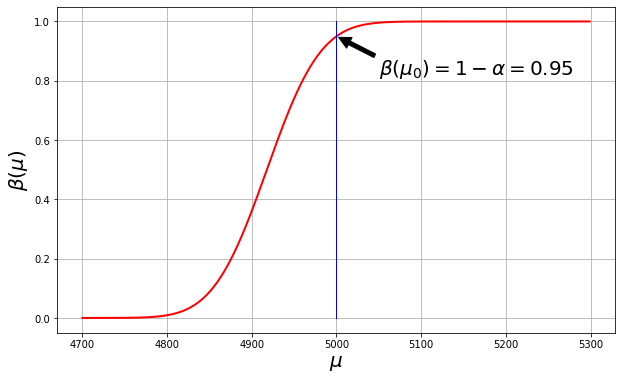

In [ ]:
# Curva característica del contraste:
mu_values = np.arange(4700, 5300, 1)
beta = np.array([norm.cdf(d_alpha, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1) for mu in mu_values])

plt.figure(figsize=(10, 6))
plt.plot(mu_values, beta, '-r', linewidth=2.0)
plt.plot([mu_0, mu_0], [0, 1], '-b', linewidth=1.0)
plt.annotate('$\\beta(\mu_0) = 1 - \\alpha = 0.95$', xy=(mu_0, 0.95), xytext=(5050, 0.82), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)

plt.grid(True)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\\beta(\mu)$', fontsize=20)
plt.show()

Para ello hemos tenido en cuenta que:

$$
d = \frac{\mu_0 - \hat{\mu}_{MV}}{\hat{\sigma}_{MV}} = \frac{\mu_0 - \mu}{\hat{\sigma}_{MV}} + \frac{\mu - \hat{\mu}_{MV}}{\hat{\sigma}_{MV}}
$$

Y que por tanto, cuando el valor real del parámetro es $\mu$, $d$ se distribuye según una:

$$
N(\frac{\mu_0 - \mu}{\hat{\sigma}_{MV}}, 1)
$$

Obsérvese que, cuando $\mu$ aumenta, la probabilidad de aceptar la hipótesis también aumenta. En cambio cuando $\mu$ disminuye dicha probabilidad también lo hace. Y por supuesto, cuando $\mu = \mu_0$, obtenemos $\beta(\mu_0) = 1 - \alpha$ como cabría esperar. En la siguiente figura se muestra el significado de $\beta(\mu)$ para tres valores de $\mu$ distintos (4900, 5000 y 5100):

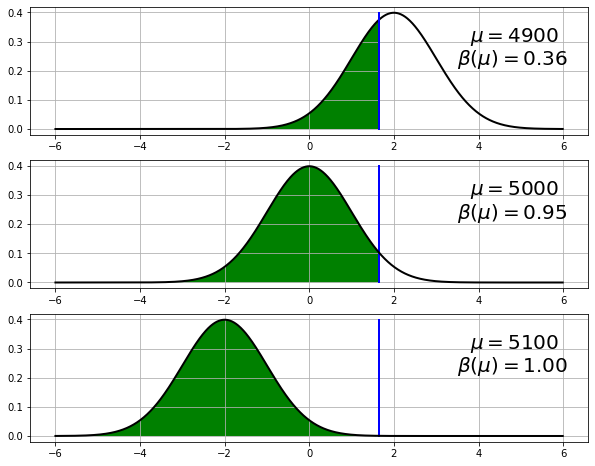

In [ ]:
x = np.arange(-6, 6, 0.01)
d_alpha = norm.ppf(0.95)
d_obs = (mu_0 - t_media_muestra) / (sigma_0/math.sqrt(n))

# Representación gráfica:
plt.figure(figsize=(10, 8))

plt.subplot(311)
mu = 4900
y = norm.pdf(x, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)
plt.fill_between(x, 0, y, (x<=d_alpha), facecolor='green')
plt.plot(x, y, '-k', linewidth=2.0)
plt.plot([d_alpha, d_alpha], [0, 0.399], '-b', linewidth=2.0)
plt.grid(True)
plt.text(3.8, 0.3, '$\mu = %d$' % (mu), fontsize=20)
plt.text(3.5, 0.22, '$\\beta(\mu) = %.2f$' % (norm.cdf(d_alpha, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)), fontsize=20)

plt.subplot(312)
mu = 5000
y = norm.pdf(x, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)
plt.fill_between(x, 0, y, (x<=d_alpha), facecolor='green')
plt.plot([d_alpha, d_alpha], [0, 0.399], '-b', linewidth=2.0)
plt.plot(x, y, '-k', linewidth=2.0)
plt.grid(True)
plt.text(3.8, 0.3, '$\mu = %d$' % (mu), fontsize=20)
plt.text(3.5, 0.22, '$\\beta(\mu) = %.2f$' % (norm.cdf(d_alpha, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)), fontsize=20)

plt.subplot(313)
mu = 5100
y = norm.pdf(x, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)
plt.fill_between(x, 0, y, (x<=d_alpha), facecolor='green')
plt.plot([d_alpha, d_alpha], [0, 0.399], '-b', linewidth=2.0)
plt.plot(x, y, '-k', linewidth=2.0)
plt.grid(True)
plt.text(3.8, 0.3, '$\mu = %d$' % (mu), fontsize=20)
plt.text(3.5, 0.22, '$\\beta(\mu) = %.2f$' % (norm.cdf(d_alpha, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1)), fontsize=20)

plt.show()

La curva característica del contraste muestra, para cada valor del parámetro, la probabilidad de aceptar la hipótesis $H_0$. La **curva de potencia** es la complementaria de la anterior, e indica la probabilidad de rechazar $H_0$ para cada valor del parámetro:

$$
Potencia(\theta) = P(rechazar \, H_0 \, | \, \theta)
$$

La siguiente figura muestra la curva de potencia para el ejemplo inicial:

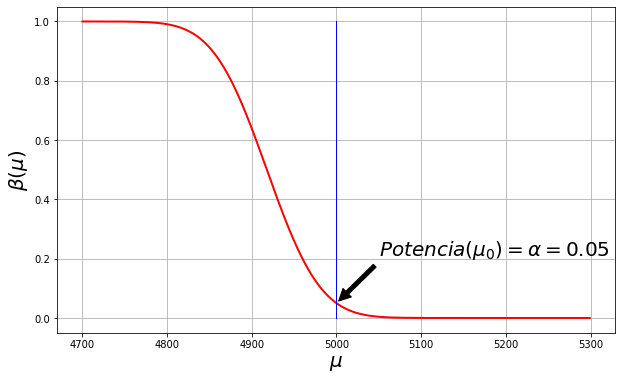

In [ ]:
# Curva de potencia del contraste:
mu_values = np.arange(4700, 5300, 1)
potencia = np.array([1.0 - norm.cdf(d_alpha, (mu_0-mu)/(sigma_0/math.sqrt(n)), 1) for mu in mu_values])

plt.figure(figsize=(10, 6))
plt.plot(mu_values, potencia, '-r', linewidth=2.0)
plt.plot([mu_0, mu_0], [0, 1], '-b', linewidth=1.0)
plt.annotate('$Potencia(\mu_0) = \\alpha = 0.05$', xy=(mu_0, 0.05), xytext=(5050, 0.21), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)

plt.grid(True)
plt.xlabel('$\mu$', fontsize=20)
plt.ylabel('$\\beta(\mu)$', fontsize=20)
plt.show()

***Ejemplo (Peña, p. 388):***

Queremos contrastar la hipótesis de que la media de una población normal es $\mu_0 = 5$ con $\sigma_0 = 2$:

- $H_0$: $\mu = \mu_0 = 5$ <br><br>

Frente a la hipótesis alternativa:

- $H_1$: $\mu > \mu_0 = 5$

Para ello contamos con una muestra con $n = 16$ observaciones. 

Construimos el estadístico:

$$
d = \frac{\hat{\mu}_{MV} - \mu_0}{\hat{\sigma}_{MV}} 
$$

Donde $\mu_0 = 5$ y $\hat{\sigma}_{MV} = \sigma_0 / \sqrt{16} = 1/2$. Sabemos que $d$ debe seguir una $N(0, 1)$ cuando la hipótesis es cierta. Si fijamos el nivel de significación $\alpha = 0.05$, podemos calcular las regiones de aceptación y rechazo:

1.6448536269514722


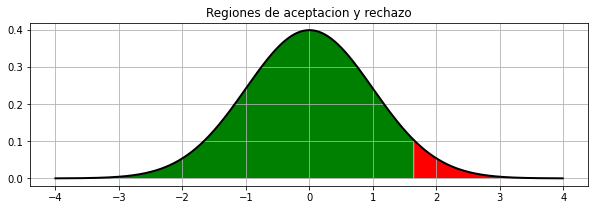

In [ ]:
# Regiones de aceptación y rechazo (para d):
alpha = 0.05
mu_0 = 5.0
sigma_0 = 2.0
n = 16.0
d_alpha = norm.ppf(1-alpha)
print(d_alpha)

# Representación gráfica de las regiones:
x = np.arange(-4, 4, 0.01)
y = norm.pdf(x)
plot_regions(x, y, d_alpha)

- Región de aceptación: $d \leq d_{\alpha} = 1.65$
- Región de rechazo: $d > d_{\alpha} = 1.65$

O, de manera equivalente, a partir de:

$$
d_{\alpha} = \frac{\mu_{\alpha} - \mu_0}{\hat{\sigma}_{MV}}
$$

Se obtiene:

$$
\mu_{\alpha} = \mu_0 + d_{\alpha} \hat{\sigma}_{MV} 
$$

5.822426813475736


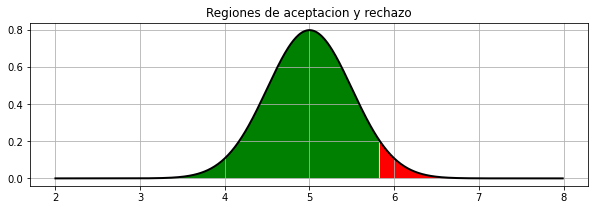

In [ ]:
# Regiones de aceptación y rechazo (para mu):
mu_alpha = mu_0 + d_alpha*sigma_0/math.sqrt(n)
print(mu_alpha)

# Representación gráfica de las regiones:
x = np.arange(2, 8, 0.01)
y = norm.pdf(x, mu_0, sigma_0/math.sqrt(n))
plot_regions(x, y, mu_alpha)

Es decir:

- Región de aceptación: $\hat{\mu}_{MV} \leq \mu_{\alpha} = 5.82$
- Región de rechazo: $\hat{\mu}_{MV} > \mu_{\alpha} = 5.82$

Si a partir de la muestra obtenemos $\hat{\mu}_{MV} = 6$, entonces debemos rechazar la hipótesis $H_0$. Tendríamos una probabilidad del 5% ($\alpha = 0.05$) de estar cometiendo un error del tipo I (rechazar la hipótesis siendo cierta). 

Podemos calcular el nivel crítico:

In [ ]:
# Nivel crítico:
mu_obs = 6.0
p = 1.0 - norm.cdf((mu_obs-mu_0)/(sigma_0/math.sqrt(n)))
print(p)

0.02275013194817921


Obtenemos $p = 0.023$, es decir que la probabilidad de obtener una muestra cuya media sea mayor o igual que 6 (suponiendo $H_0$) es del 2.3%. 

Finalmente vamos a calcular la probabilidad de cometer un error del tipo II cuando la media real es $\mu = 6$. 

In [ ]:
# Error tipo II:
beta = norm.cdf(d_alpha, (mu_obs-mu_0)/(sigma_0/math.sqrt(n)), 1)
print(beta)

0.3612399686876647


Obtenemos $\beta(6) = 0.361$, es decir que si la media real es $\mu = 6$ tenemos una probabilidad del 36.1% de aceptar la hipótesis $H_0$ siendo incorrecta.

<hr>

***Ejercicios (Peña, p. 391):***

1. Si la distribución de una discrepancia es una $\chi^2$ con un grado de libertad, construye la región de rechazo para un contraste unilateral con $\alpha = 0.01$.
 
2. La distribución de una discrepancia es una $\chi^2$ con un grado de libertad. El valor observado en la muestra para ella es 5. Calcula el valor crítico $p$ correspondiente.

3. Se mide la vida media de 100 componentes y se obtiene 250 horas. Bajo la suposición de que el tiempo de vida es exponencial, contrasta la hipótesis de que la vida media de la población es 300 horas. Dibuja las regiones de aceptación y rechazo para un nivel de significación $\alpha=0.05$ y contraste bilateral. ¿Cuál es el valor crítico del contraste?

## 4. Contrastes para una población

En esta sección vamos a estudiar distintos tipos de contrastes paramétricos para distribuciones de una variable. La metodología es siempre la expuesta anteriormente, aunque en cada caso el estadístico de discrepancia se define de una manera distinta.


### 4.1. Contraste para una proporción

- $H_0$: la proporción de elementos con la característica $C$ en una población es $p=p_0$. <br><br>

- $H_1$: la proporción es $p \neq p_0$.

Para contrastar la hipótesis tomamos una muestra de $n$ elementos de la población y observamos una proporción de elementos con la característica $C$ igual a $\hat{p} = r/n$. Suponiendo que $H_0$ es cierta, el número de elementos $r$ con la característica debe seguir una distribución binomial con parámetro $p_0$:

$$
P(r) = \binom {n} {r} p_0^r(1-p_0)^{n-r}
$$

De modo que podemos tomar como medida de discrepancia la diferencia entre el valor $\hat{r}$ observado y el esperado $np_0$:

$$
d = |np_0 - \hat{r}|
$$

Para muestras grandes podemos aproximar la distribución binomial por una normal:

$$
\hat{p} \sim N(p_0, \sqrt{\frac{p_0 (1 - p_0)}{n}})
$$

***Ejemplo (Peña, p. 392)***

Una dama inglesa afirma ser capaz de distinguir si un té con leche ha sido preparado echando primero la leche y luego el té o al revés. Para comprobar si es cierto se preparan 10 tazas de té con leche, 5 preparadas de cada manera, y se le dan a probar. La dama acierta 8 de las 10 tazas. ¿Es esto una evidencia significativa de que es capaz de apreciar el cambio de sabor?

- $H_0$: la dama no es capaz de notar el cambio de sabor, y por tanto $p = p_0 = 0.5$.
- $H_1$: la dama sí es capaz de notar el cambio de sabor, y por tanto $p > p_0 = 0.5$.

Suponiendo que la hipótesis $H_0$ es cierta, la probabilidad de acertar exactamente r tazas es:

$$
P(r) = \binom {n} {r} p_0^r(1-p_0)^{n-r} = \binom {10} {r} \frac{1}{2^{10}}
$$

Y la probabilidad de acertar 7 o menos tazas es:

$$
P(r \leq 7) = \sum_{k=0}^{7} \binom {10} {k} \frac{1}{2^{10}} = 0.945
$$

Este número lo podemos calcular fácilmente en python usando el módulo de SciPy <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html">binom</a>:

In [ ]:
p0 = 0.5
n = 10
r = 7
prob = binom.cdf(r, n, p0)
print(prob)

0.9453125


Por tanto la probabilidad de acertar 8 o más tazas (el nivel crítico) es aproximadamente $0.055$. Parece razonable por tanto aceptar que la dama inglesa es capaz de percibir los cambios de sabor. En la siguiente figura se muestra cómo se distribuye la probabilidad de acertar $r$ tazas cuando $p_{0} = 0.5$.

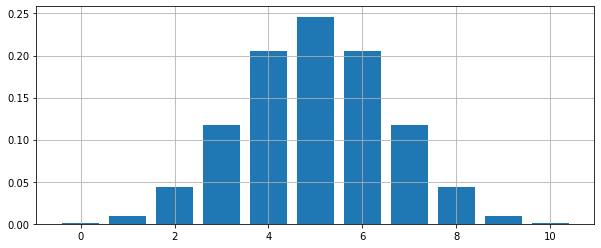

In [ ]:
x = np.arange(0,n+1)
y = binom.pmf(x, n, p0)

plt.figure(figsize=(10, 4))
plt.bar(x, y, linewidth=2.0, align = 'center')
plt.grid(True)
plt.show()

***Ejemplo (Peña, p.393)***

La proporción de electores que votaron al partido X en las pasadas elecciones fue del 25%. En el último sondeo realizado con una muestra de $n=500$ electores, se ha obtenido una proporción del 22%. ¿Hay evidencia de un cambio en la proporción de votantes del partido X?

- $H_0$: no hay cambio en la proporción de votantes del partido X, y por tanto $p = p_0 = 0.25$.
- $H_1$: sí hay cambio en la proporción de votantes del partido X, y por tanto $p \neq p_0 = 0.25$.

Si la hipótesis $H_0$ es cierta, entonces la proporción $\hat{p}$ de votantes del partido X en una muestra de $n=500$ electores debe seguir aproximadamente la siguiente distribución:

$$
\hat{p} \sim N(p_0, \sqrt{\frac{p_0 (1 - p_0)}{n}})
$$

Y por tanto:

$$
d = \frac{\hat{p} - p_0}{\sqrt{\frac{p_0 (1 - p_0)}{n}}} \sim N(0, 1)
$$

Fijamos $\alpha = 0.05$ y calculamos las regiones de aceptación y rechazo para contraste bilateral:

In [ ]:
alpha = 0.05
d_alpha_medios = norm.ppf(1.0 - alpha/2.0)
print(d_alpha_medios)

1.959963984540054


Obtenemos un valor de $d_{\alpha/2}$ de aproximadamente $1.96$. Por tanto:

- Región de aceptación: aceptamos $H_0$ si $-1.96 \leq d \leq 1.96$.<br><br>
- Región de rechazo: rechazamos $H_0$ si $d < -1.96$ o $d > 1.96$.

En este ejemplo tenemos $\hat{d} = -1.55$:

In [ ]:
p_obs = 0.22
p0 = 0.25
n = 500.0
d_obs = (p_obs - p0)/math.sqrt(p0*(1.0-p0)/n)
print(d_obs)

-1.5491933384829668


Que cae dentro de la región de aceptación. Por tanto concluimos que no hay evidencia suficiente para un cambio en la proporción de votantes del partido X. La siguiente figura resume estas observaciones.

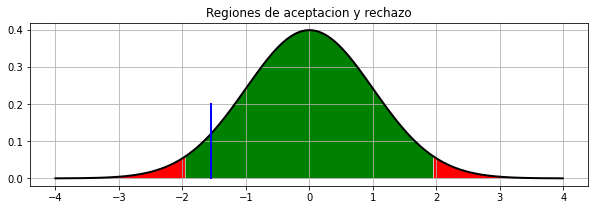

In [ ]:
x = np.arange(-4, 4, 0.01)
y = norm.pdf(x)
plot_regions(x, y, d_alpha_medios, tinf=-d_alpha_medios, tobs=d_obs)

### 4.2. Contraste para la media en una población normal

- $H_0$: la media de la población es $\mu=\mu_0$. <br><br>

- $H_1$: la media es $\mu \neq\mu_0$.

La varianza no se conoce. Dada una muestra de $n$ elementos tomados al azar de la población, y suponiendo $H_0$ cierta, la media muestral $\bar{x}$ sigue una normal $N(\mu_0, \sigma)$, con $\sigma$ desconocida, y el estadístico:

$$
d = \frac{\bar{x} - \mu_0}{\hat{s}/\sqrt{n}}
$$

Se distribuye según una $t$ de Student con $n-1$ grados de libertad. La $\hat{s}$ del denominador es la desviación estándar muestral corregida:

$$
\hat{s} = \sqrt{\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}{n-1}}
$$

Fijado el nivel de significación $\alpha$, la región de aceptación vendrá dada por:

$$
|\bar{x}-\mu_0| \leq t_{\alpha/2} \frac{\hat{s}}{\sqrt{n}}
$$

O, de manera equivalente:

$$
\frac{|\bar{x}-\mu_0|}{\hat{s} /\sqrt{n}} \leq t_{\alpha/2} 
$$

O bien:

$$
-t_{\alpha/2} \leq \frac{\bar{x}-\mu_0}{\hat{s} /\sqrt{n}} \leq t_{\alpha/2} 
$$

Donde $t_{\alpha/2}$ es el valor de la distribución $t$ tal que entre $-t_{\alpha/2}$ y $t_{\alpha/2}$ hay un $1-\alpha$ de probabilidad.

El *nivel crítico* viene dado por:

$$
p = P(|t| > \frac{|\bar{x} - \mu_0|}{\hat{s}/\sqrt{n}})
$$

Cuando el contraste es unilateral, por ejemplo $H_1$: $\mu > \mu_0$, la región de aceptación viene dada por:

$$
\frac{\bar{x}-\mu_0}{\hat{s} /\sqrt{n}} \leq t_{\alpha} 
$$

Y el nivel crítico por:

$$
p = P(t > \frac{\bar{x} - \mu_0}{\hat{s}/\sqrt{n}})
$$


***Ejemplo (Peña, p. 396)***

Sea la siguiente muestra: 203, 229, 215, 220, 223, 233, 208, 228, 209. Contrasta la hipótesis de que la muestra proviene de una población normal con media 220 y desviación estándar cualquiera.

- $H_0$: la muestra proviene de una población normal con $\mu = \mu_0 = 220$
- $H_1$: la muestra proviene de una población normal con $\mu \neq \mu_0 = 220$

Sabemos que, si $H_0$ es cierta, el estadístico:

$$
d = \frac{\bar{x} - \mu_0}{\hat{s}/\sqrt{n}}
$$

se distribuye según una $t$ de Student con $n-1$ grados de libertad. Tenemos $n = 9$, $\mu_0 = 220$, $\bar{x}=218.67$ y $\hat{s}=10.52$: 

In [ ]:
x = np.array([203, 229, 215, 220, 223, 233, 208, 228, 209])
xmedia = np.mean(x)
print(xmedia)
s = np.std(x, ddof=1)
print(s)

218.66666666666666
10.523782589924593


Fijamos el nivel de significación $\alpha = 0.05$ y calculamos el valor de $t_{\alpha/2}$:

In [ ]:
alpha = 0.05
n = 9.0
t_alpha_medios = student.ppf(1-alpha/2.0,n-1)
print(t_alpha_medios)

2.3060041350333704


La región de aceptación es por tanto:

$$
-2.31 \leq \frac{\bar{x}-\mu_0}{\hat{s} /\sqrt{n}} \leq 2.31 
$$

El valor observado para $d$ es:

$$
\hat{d} = \frac{\bar{x} - \mu_0}{\hat{s}/\sqrt{n}} = -0.38
$$

In [ ]:
mu_0 = 220.0
d_obs = (xmedia - mu_0) / (s/math.sqrt(n)) 
print(d_obs)

-0.38009147051646663


Que como vemos cae dentro de la región de aceptación (ver figura a continuación). Por tanto la hipótesis se acepta.

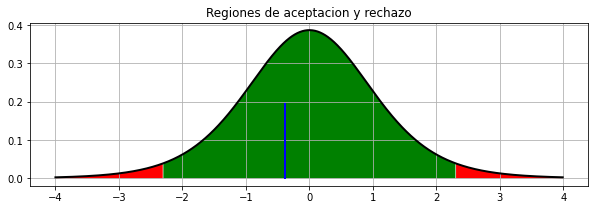

In [ ]:
x = np.arange(-4, 4, 0.01)
y = student.pdf(x, n-1)
plot_regions(x, y, t_alpha_medios, tinf=-t_alpha_medios, tobs=d_obs)

### 4.3. Contraste para la media en una población arbitraria

Si desconocemos la forma en la que se distribuye la población podemos utilizar, para muestras suficientemente grandes ($n>30$), el hecho de que en estos casos la media muestral es asintóticamente normal:

$$
\bar{x} \sim N(\mu, \hat{s}/\sqrt{n})
$$

En estos casos utilizamos la distribución $t$ de Student para hacer el contraste igual que antes.

### 4.4. Contraste para la varianza en una población normal

- $H_0$: la varianza de la población es $\sigma^2=\sigma_0^2$. <br><br>

- $H_1$: la varianza de la población es $\sigma^2 \neq \sigma_0^2$.

La media no se conoce. Dada una muestra de $n$ elementos tomados al azar de la población, y si $H_0$ es cierta, entonces el estadístico:

$$
d = \frac{(n-1)\hat{s}^2}{\sigma_0^2}
$$

Se distribuye según una $\chi_{n-1}^2$ (distribución chi cuadrado con $n-1$ grados de libertad). Como antes, $\hat{s}$ es la desviación estándar muestral corregida. Fijando el nivel de significación $\alpha$, la región de aceptación será:

$$
\chi_{1-\alpha/2}^2 \leq \frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{\alpha/2}^2 
$$

Cuando el contraste es unilateral, por ejemplo $H_1$: $\sigma^2 > \sigma_0^2$, la región de aceptación viene dada por:

$$
\frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq \chi_{\alpha}^2 
$$


***Ejemplo (continuación)***

Con la muestra anterior, contrasta la hipótesis de que la muestra proviene de una población normal con desviación estándar 7.75 y media cualquiera frente a la hipótesis alternativa de que la desviación estándar es mayor que 7.75.

- $H_0$: la muestra proviene de una población normal con $\sigma^2=\sigma_0^2=7.75^2$.
- $H_1$: la muestra proviene de una población normal con $\sigma^2 > \sigma_0^2=7.75^2$.

Fijamos $\alpha = 0.05$ y buscamos el valor $\chi_{\alpha}^2$ que delimita la región de aceptación:

In [ ]:
alpha = 0.05
chi_alpha = chi2.ppf(1.0-alpha, n-1)
print(chi_alpha)

15.50731305586545


Obtenemos así la región de aceptación:

$$
\frac{(n-1)\hat{s}^2}{\sigma_0^2} \leq 15.51
$$

El valor observado es:

$$
\hat{d} = \frac{(n-1)\hat{s}^2}{\sigma_0^2} = 14.75
$$

In [ ]:
sigma_0 = 7.75
d_obs = (n-1)*s*s/(sigma_0*sigma_0)
print(d_obs)

14.751300728407907


Que cae dentro de la región de aceptación (ver figura), por tanto aceptamos la hipótesis $H_0$. 

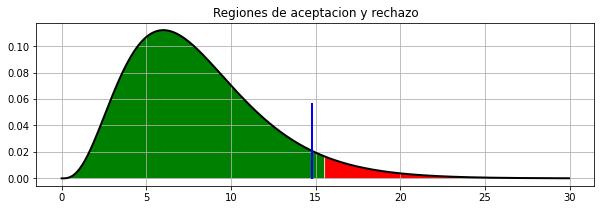

In [ ]:
x = np.arange(0, 30, 0.05)
y = chi2.pdf(x, n-1)
plot_regions(x, y, chi_alpha, tobs=d_obs)

***Ejercicios (Peña, p. 407)***

1. La variabilidad de un proceso en condiciones correctas es 3. Se toma una muestra de tamaño 15 y se observan los siguientes valores: 27, 17, 18, 30, 17, 22, 16, 23, 26, 20, 22, 16, 23, 21 y 17.

    - Contrasta la hipótesis de funcionamiento correcto con $\alpha = 0.05$.
    - Calcula el valor crítico del contraste. 
    - Suponiendo una desviación estándar como la observada, ¿cuál es el tamaño máximo que debería tener la muestra para poder aceptar la hipótesis? 
<br>
<br>

2. Un proceso industrial fabrica piezas cuyas longitudes se distribuyen normalmente con $\mu = 190$ y $\sigma = 10$. En una muestra de tamaño $5$ se obtienen las longitudes 187, 212, 195, 208 y 192.

    - Contrasta que la media es 190 con $\alpha = 0.05$.
    - Contrasta que la varianza es 100 con $\alpha = 0.05$.
    - Suponiendo que la varianza es 100, construye la curva de potencia para el contraste de la media con $\alpha = 0.05$.
<br>
<br>

3. Un partido político afirma que el 55% de los electores está de acuerdo con él. Se toma una muestra de 1000 electores y se obtiene una proporción del 52%. ¿Puede el partido sostener su afirmación con $\alpha = 0.05$? ¿Qué tamaño debería tener la muestra para poder rechazar la afirmación con $\alpha = 0.01$?